In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import bidi.algorithm
import arabic_reshaper
import adhtools.utils

In [2]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/topicmodelling/'

In [3]:
document_topics = pd.read_csv(os.path.join(fpath, 'fiqh_roots_document_topics_20.csv'), index_col=0).sort_index()
df_topics = pd.read_csv(os.path.join(fpath, 'fiqh_roots_topics_20.csv'), index_col=0)
metadata = pd.read_csv(os.path.join(fpath, 'metadata.csv'), index_col=0)

In [4]:
metadata.to_csv(os.path.join(fpath, 'metadata.csv'))

In [5]:
#metadata = metadata.set_index('filename')

In [5]:
topic_names = df_topics['0'] +' '+ df_topics['1'] +' '+ df_topics['3']

In [6]:
# import glob
# book_files = glob.glob('/media/sf_VBox_Shared/Arabic/Fiqh/2018-11-13-Fiqh-stemmed-chapters/*.xml')
# c = adhtools.utils.corpus_wordlist(book_files, analyzer=False, field='proposed_root')
# chapter_lengths = {os.path.basename(b): len(l) for (b,l) in zip (book_files, c)}
# metadata['ChapterLength'] = pd.Series(chapter_lengths)

In [7]:
def split_fname(fname):
    splitted = fname.split('-')
    bookname = splitted[0]
    if len(splitted)>1:
        chapter = int(splitted[-1].split('.')[0])
    else:
        chapter = 0
    return (bookname, chapter)
fnames = document_topics.index
ind = pd.MultiIndex.from_tuples(document_topics.index.map(split_fname))
document_topics = document_topics.set_index(ind)
fnames_s = pd.Series(fnames, index=ind)

In [8]:
document_topics.head()

0         1         2         3         4  \
0179MalikIbnAnas.Muwatta 0  0.002902  0.000264  0.000264  0.000264  0.467282   
                         1  0.001923  0.021154  0.001923  0.001923  0.213462   
                         2  0.001786  0.001786  0.001786  0.001786  0.430357   
                         3  0.000741  0.000741  0.008148  0.000741  0.489630   
                         4  0.004044  0.004044  0.000368  0.000368  0.140074   

                                   5         6         7         8         9  \
0179MalikIbnAnas.Muwatta 0  0.000264  0.525330  0.000264  0.000264  0.000264   
                         1  0.001923  0.617308  0.001923  0.001923  0.001923   
                         2  0.001786  0.537500  0.001786  0.001786  0.001786   
                         3  0.000741  0.430370  0.000741  0.000741  0.000741   
                         4  0.000368  0.761397  0.000368  0.000368  0.000368   

                                  10        11        12        13        14  \
0179MalikIbnAnas.Muwatta 0  0.000264  0.000264  0.000264  0.000264  0.000264   
                         1  0.001923  0.001923  0.001923  0.001923  0.001923   
                         2  0.001786  0.001786  0.001786  0.001786  0.001786   
                         3  0.000741  0.000741  0.000741  0.000741  0.045185   
                         4  0.000368  0.000368  0.000368  0.000368  0.000368   

                                  15        16        17        18        19  
0179MalikIbnAnas.Muwatta 0  0.000264  0.000264  0.000264  0.000264  0.000264  
                         1  0.001923  0.117308  0.001923  0.001923  0.001923  
                         2  0.001786  0.001786  0.001786  0.001786  0.001786  
                         3  0.000741  0.008148  0.000741  0.008148  0.000741  
                         4  0.084926  0.000368  0.000368  0.000368  0.000368

In [9]:
fnames_s.name = 'filename'

In [10]:
metadata_newind = metadata.join(fnames_s.reset_index().set_index('filename')).set_index(['level_0', 'level_1'])

In [11]:
new_ind = []
book_names = sorted(ind.levels[0])
for book in book_names:
    new_ind.extend(list(range(len(document_topics.loc[book]))))
new_ind = pd.MultiIndex.from_tuples(zip(ind.get_level_values(0), new_ind))

In [12]:
largest_topics = document_topics.idxmax(axis=1)
largest_topics = pd.concat([largest_topics,  metadata_newind['ChapterLength'], metadata_newind['Number_of_tokens']], axis=1)
#largest_topics.index = new_ind
largest_topics = largest_topics.reset_index()
largest_topics.columns = ['book', 'chapter', 'topic', 'length', 'total_length']
book_dict = {b: i for i,b in enumerate(book_names)}

In [13]:
metadata_newind['topic'] = largest_topics.set_index(['book', 'chapter'])['topic']
metadata_newind['topic_name'] = [topic_names[int(topic)] for topic in metadata_newind['topic']]

In [14]:
metadata_newind.to_csv(os.path.join(fpath, 'chapters_metadata_topics.csv'))

In [15]:
largest_topics['x1'] = largest_topics.groupby('book')['length'].transform(pd.Series.cumsum)
largest_topics['x0'] = largest_topics['x1'] - largest_topics['length']

In [16]:
largest_topics['total_length'] = largest_topics.groupby('book')['x1'].transform(lambda l: [l.max()]*len(l))

In [17]:
largest_topics['perc0'] = largest_topics['x0'] / largest_topics['total_length']
largest_topics['perc1'] = largest_topics['x1'] / largest_topics['total_length']

In [18]:
largest_topics[650:660]

,book,chapter,topic,length,total_length,x1,x0,perc0,perc1
650,0179MalikIbnAnas.Muwatta,650,6,171,140946,140758,140587,0.997453,0.998666
651,0179MalikIbnAnas.Muwatta,651,6,33,140946,140791,140758,0.998666,0.998900
652,0179MalikIbnAnas.Muwatta,652,6,118,140946,140909,140791,0.998900,0.999737
653,0179MalikIbnAnas.Muwatta,653,6,37,140946,140946,140909,0.999737,1.000000
654,0182AbuYusufYacqub.Kharaj.xml,0,7,67701,67701,67701,0,0.000000,1.000000
655,0264IbnYahyaMuzani.Mukhtasar,0,0,170,175122,170,0,0.000000,0.000971
656,0264IbnYahyaMuzani.Mukhtasar,1,0,161,175122,331,170,0.000971,0.001890
657,0264IbnYahyaMuzani.Mukhtasar,2,0,48,175122,379,331,0.001890,0.002164
658,0264IbnYahyaMuzani.Mukhtasar,3,0,79,175122,458,379,0.002164,0.002615
659,0264IbnYahyaMuzani.Mukhtasar,4,0,672,175122,1130,458,0.002615,0.006453


In [28]:
#color_list = sns.color_palette(n_colors=len(topic_names))
color_list = sns.color_palette("muted", n_colors=10) + sns.color_palette("dark", n_colors=10)

In [29]:
import matplotlib.colors

def style_row(row):
    topic_id = int(row.name)
    color = matplotlib.colors.to_hex(color_list[topic_id])
    attr = 'background-color: {}'.format(color)
    return [attr for v in  row]
df_topics.style.apply(style_row, axis=1)

,0,1,2,3,4,5,6,7,8,9
0,صحي,وبأ,عبر,شرح,ظهر,الخ,خلف,ذكر,غور,اه
1,وقع,قعي,حوض,شهر,رجع,ثني,زوج,عدا,ثلث,طلق
2,خلف,ذكر,سأل,شفع,صحي,وجه,أبن,غور,روي,ثني
3,وهب,بيع,سود,موت,حري,قوم,ملك,كتب,ولد,عتق
4,جرح,عمد,عقل,قوم,سرق,قصص,جني,قطع,ودي,قتل
5,شرط,نفع,غصب,شرك,أرض,جور,مول,ملك,عمل,أجر
6,عبر,علم,خبر,ذكر,عرف,خلف,سلم,ظهر,غور,عدم
7,سحن,خلف,أخذ,كتب,شهب,غور,فلي,ملك,قسم,أبن
8,خرج,كلم,سمي,نذر,دخل,كفر,أكل,حنث,يمن,حلف
9,مول,بقي,خمس,موت,نصف,عشر,ربع,ورث,وصي,ثلث


In [30]:
def plot_bar_per_book(largest_topics, xmin_col, xmax_col, book_names, topic_names, legend=True):
    book_dict = {b: i for i,b in enumerate(book_names)}

    plt.figure(figsize=(25, np.floor(len(book_names)*0.5)))
    ax = plt.gca()
    for topic in range(len(topic_names)):
        topic_name = topic_names[topic]
        largest_topics_sub = largest_topics[largest_topics['topic']==str(topic)]
        color = color_list[topic] 


        y = [book_dict[s] for s in largest_topics_sub['book']]
        #x = largest_topics_sub['chapter']
        xmin = largest_topics_sub[xmin_col]
        xmax = largest_topics_sub[xmax_col]
        ax.hlines(y, xmin, xmax, #marker='s', edgecolors=None, 
                  colors=np.array((color,)), lw=10,
                   label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_name)))
    ax.set_yticks(np.arange(len(book_dict)))
    ax.set_yticklabels(book_names)
    ax.set_xlim(0, largest_topics[xmax_col].max())
    ax.set_ylim(-0.5, len(book_names))
    if legend:
        plt.legend(fontsize='large')
    ax.invert_yaxis()
    plt.show()

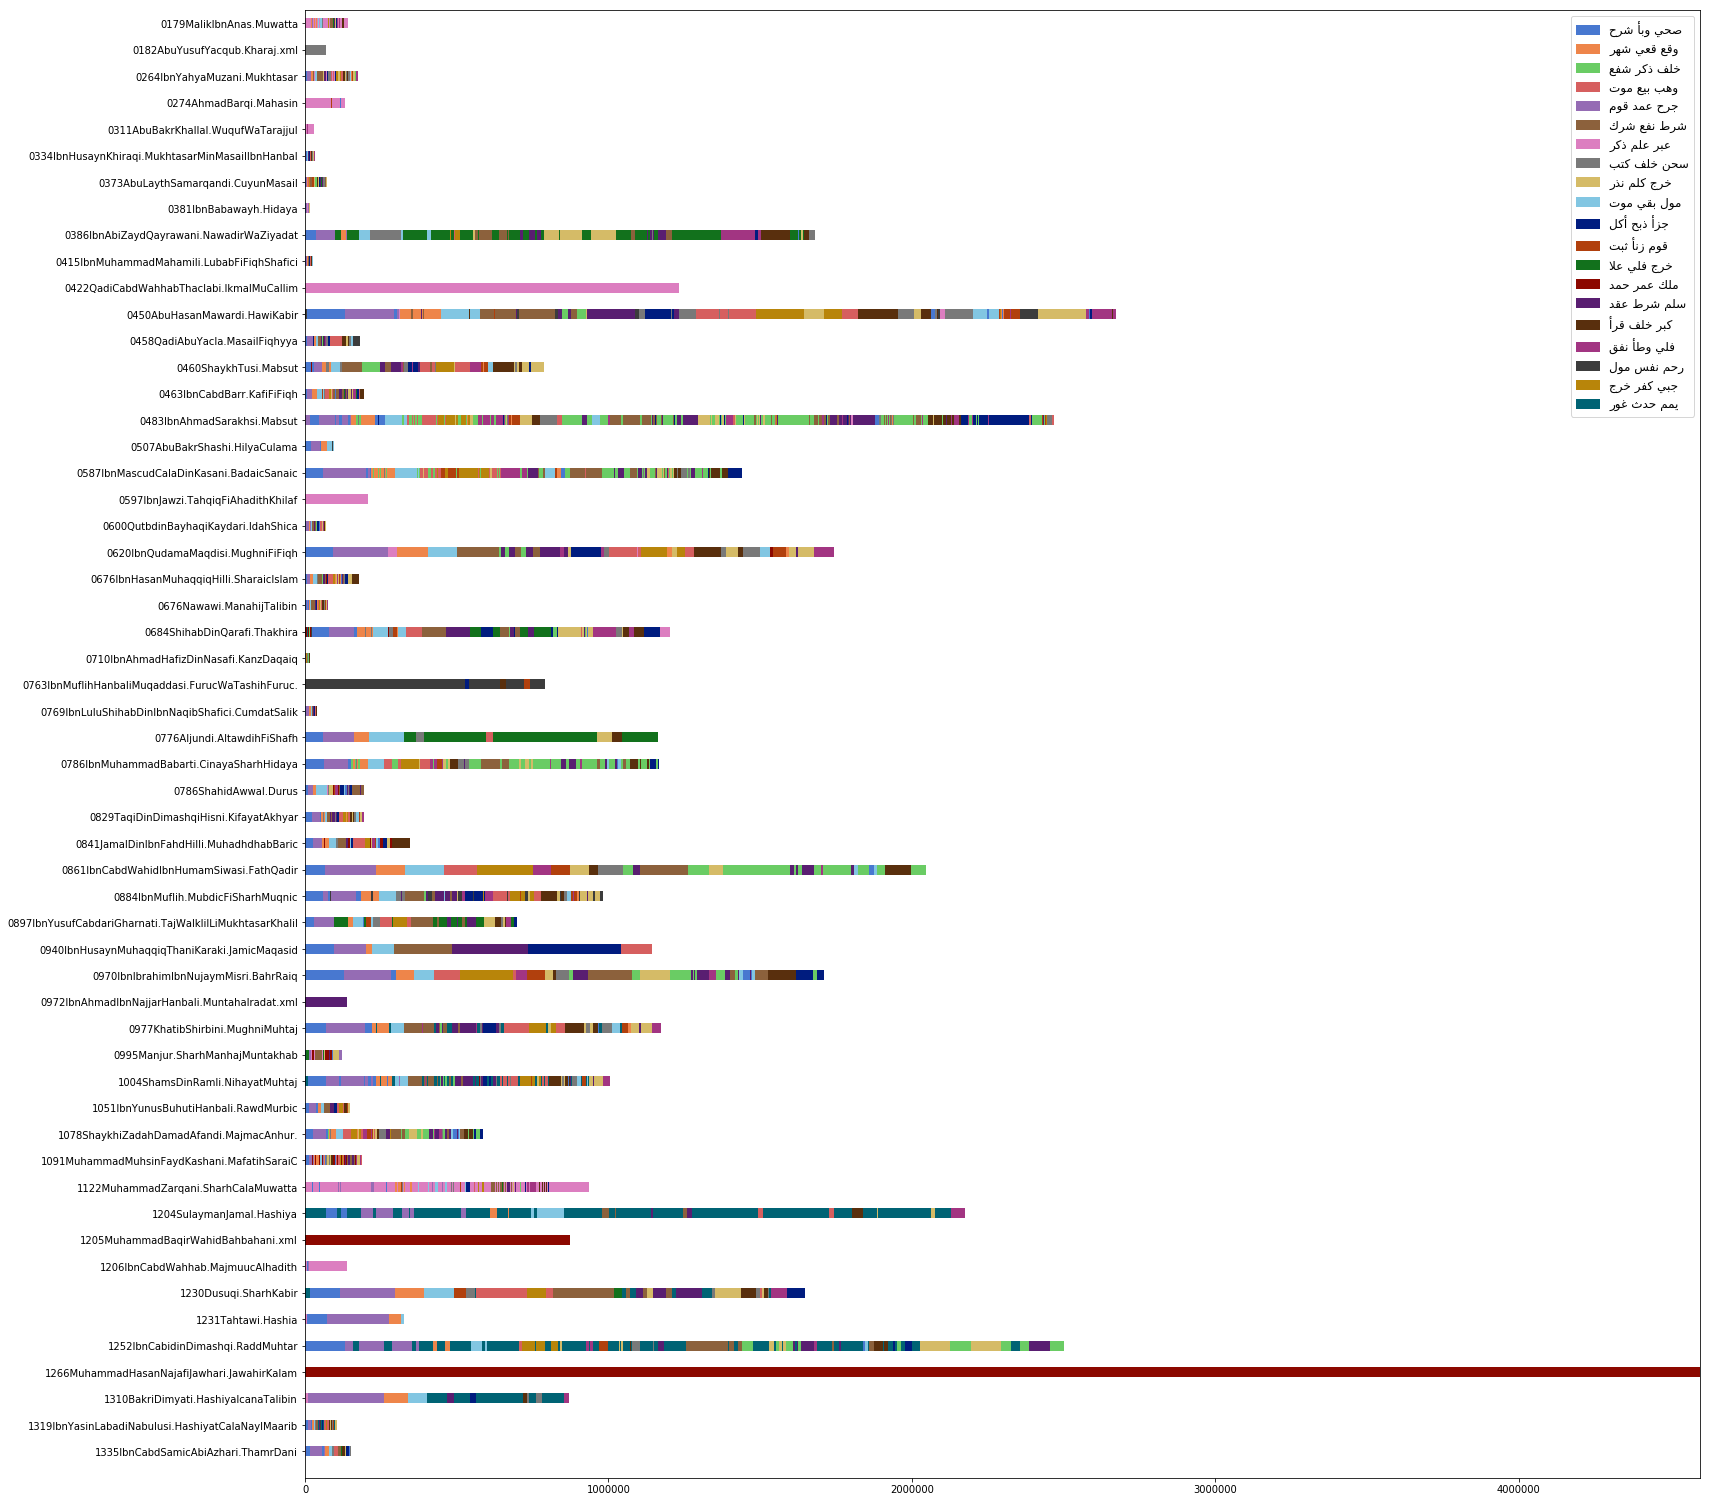

In [31]:
plot_bar_per_book(largest_topics, 'x0', 'x1', book_names, topic_names, legend=True)

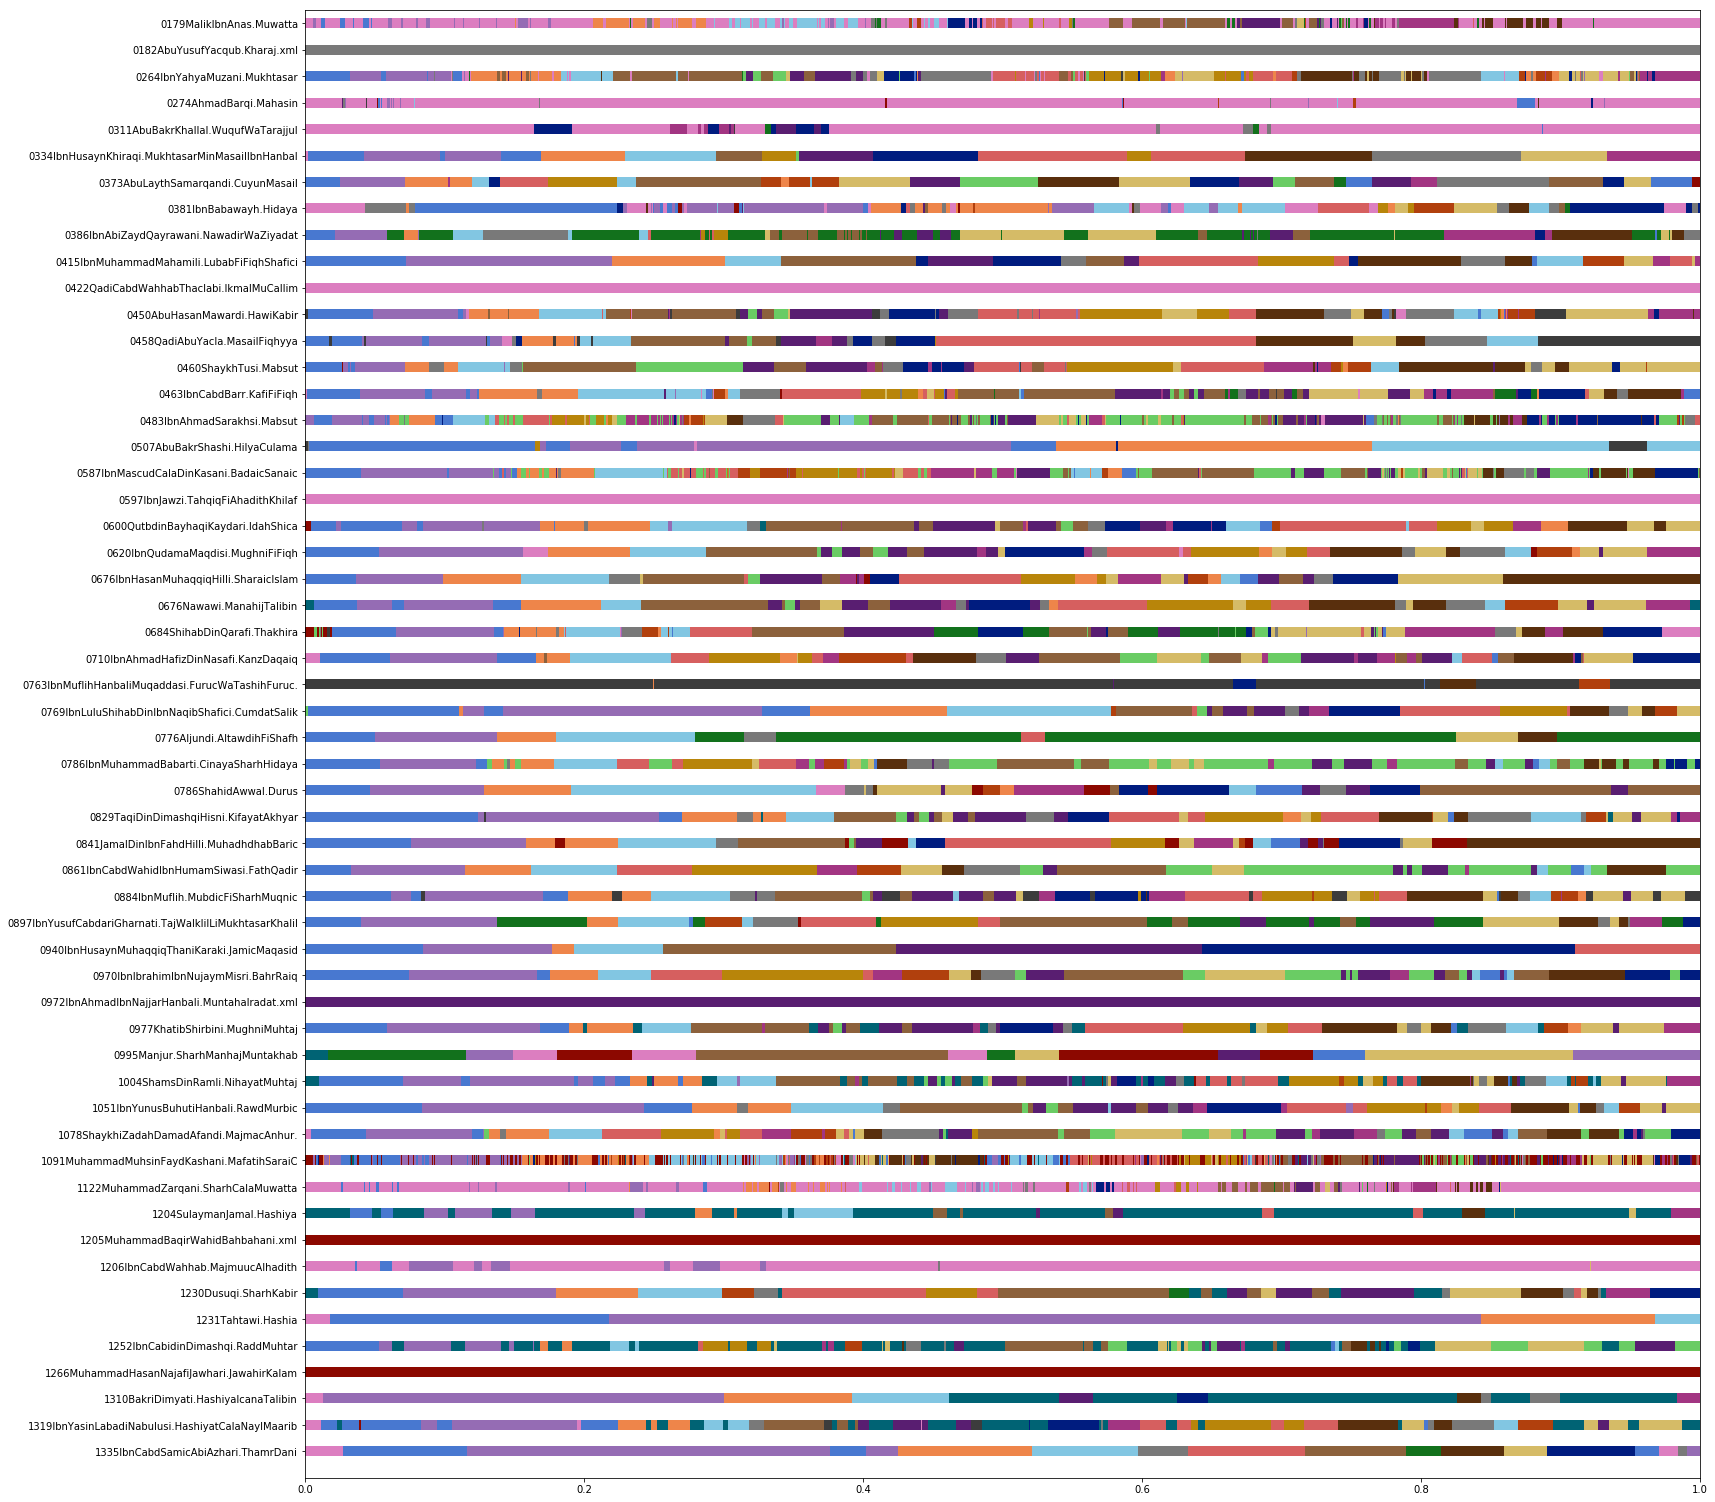

In [32]:
plot_bar_per_book(largest_topics, 'perc0', 'perc1', book_names, topic_names, legend=False)

مالكي


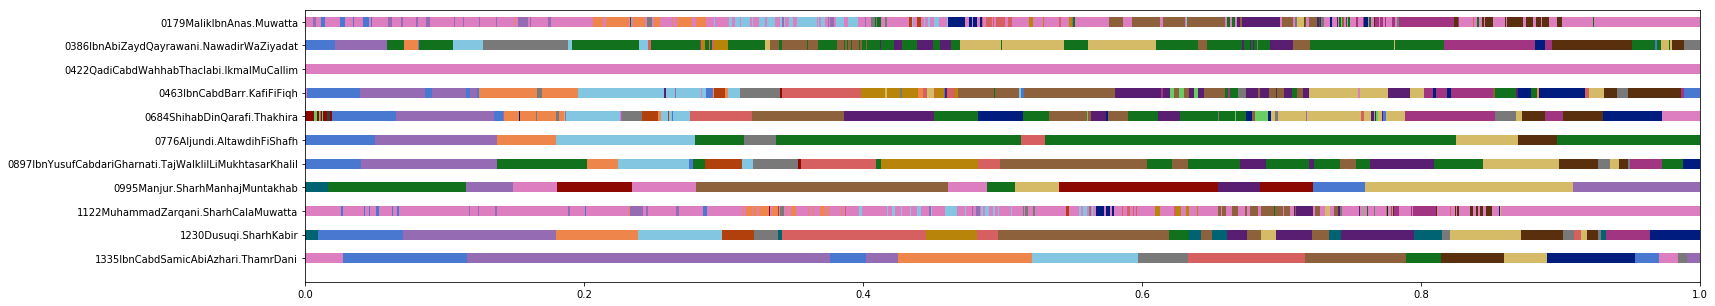

حنفي


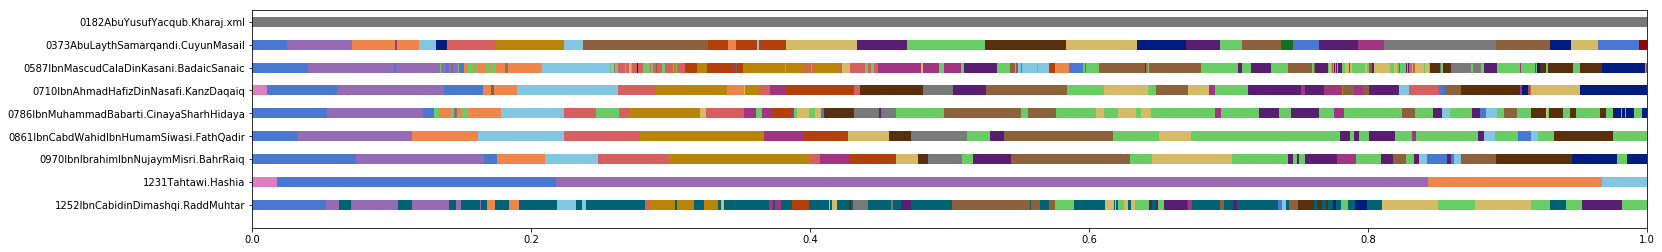

شافعي


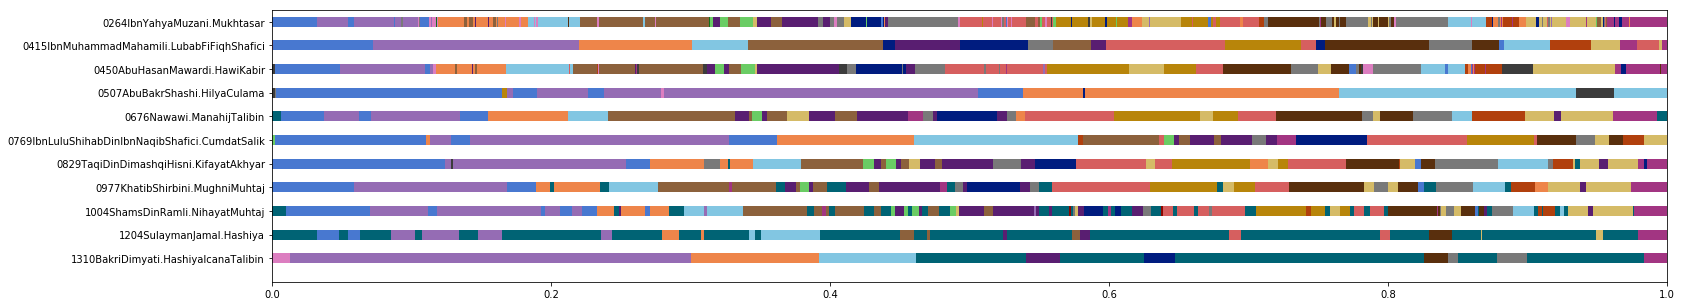

شيعي


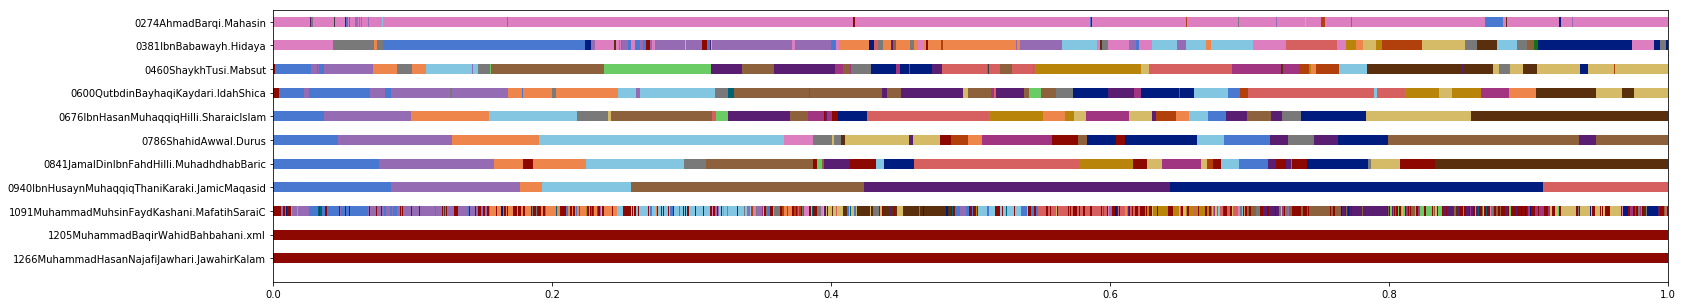

حنبلي


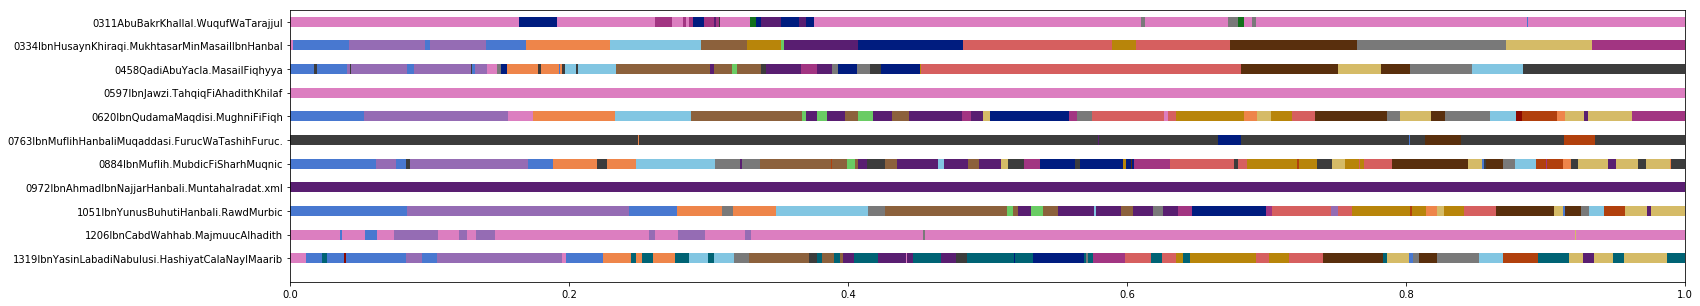

In [33]:
for subj in metadata.BookSUBJ.unique():
    if type(subj)==str:
        print(subj)
        ind_sub = metadata_newind[metadata_newind.BookSUBJ==subj].index.to_frame()
        ind_sub.columns = ['book', 'chapter']
        largest_topics_sub = largest_topics.merge(ind_sub, how='inner')
        plot_bar_per_book(largest_topics_sub, 'perc0', 'perc1', largest_topics_sub.book.unique(), topic_names, legend=False)

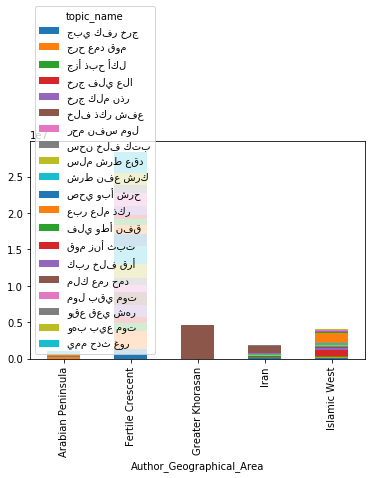

In [34]:
metadata_newind.groupby(['Author_Geographical_Area', 'topic_name'])['ChapterLength'].sum().unstack().plot(kind='bar', stacked=True)

In [35]:
def plot_bars_per_topic(df, topic_names, col1, col2='ChapterLength', aggfunc=sum, reshape_col1=False):
    plt.figure(figsize=(15,10))
    ax = plt.gca()
    values = df.groupby([col1, 'topic'])[col2].apply(aggfunc).sort_values()
    values = values.unstack().fillna(0)
    sorted_index = values.sum(axis=1).sort_values(ascending=False).index
    values = values.loc[sorted_index,:]
    ind0 = values.index
    ind1 = values.columns
    x = np.arange(len(ind0))
    last_y = np.repeat(0, len(ind0))
    for t in ind1:
        y = values[t]
        ax.bar(x, y, bottom=last_y, color=color_list[int(t)],
                label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_names[int(t)])))
        last_y = last_y+y
    if reshape_col1:
        xlabels = [bidi.algorithm.get_display(arabic_reshaper.reshape(l)) for l in ind0]
    else:
        xlabels = ind0
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=90)
    plt.legend()
    plt.show()

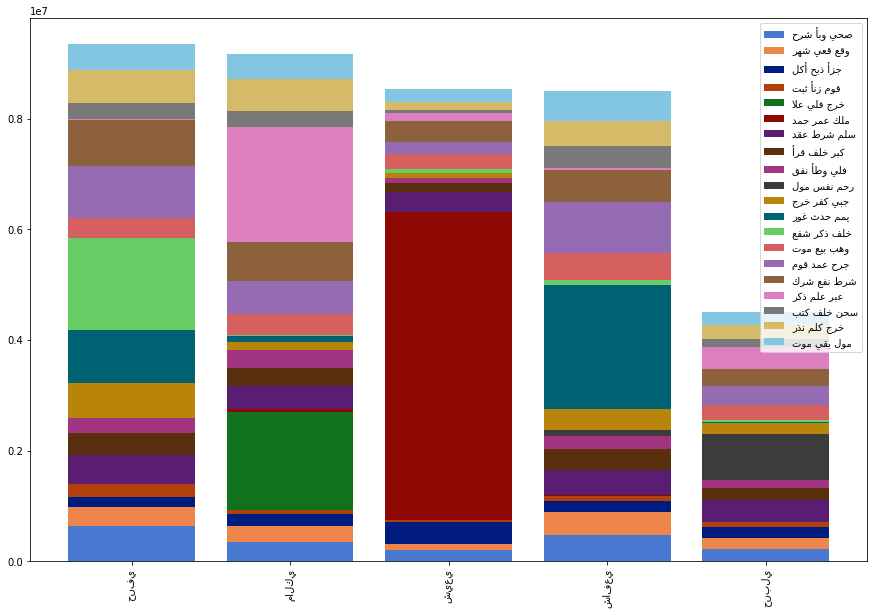

In [36]:
# Here we see the total number of tokens per topic
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ')

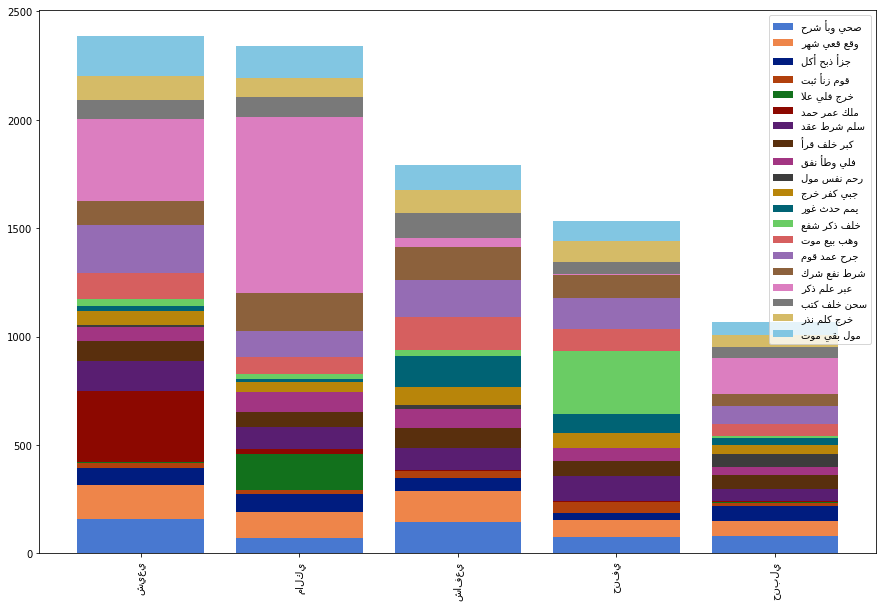

In [37]:
# Here we see only the number of chapters
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ', aggfunc=len)

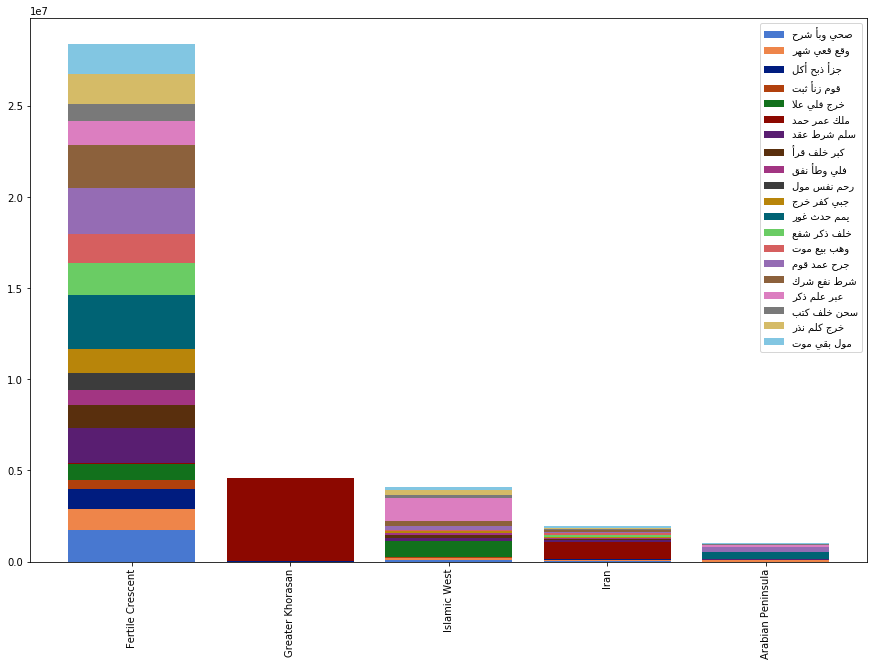

In [38]:
plot_bars_per_topic(metadata_newind, topic_names, 'Author_Geographical_Area')

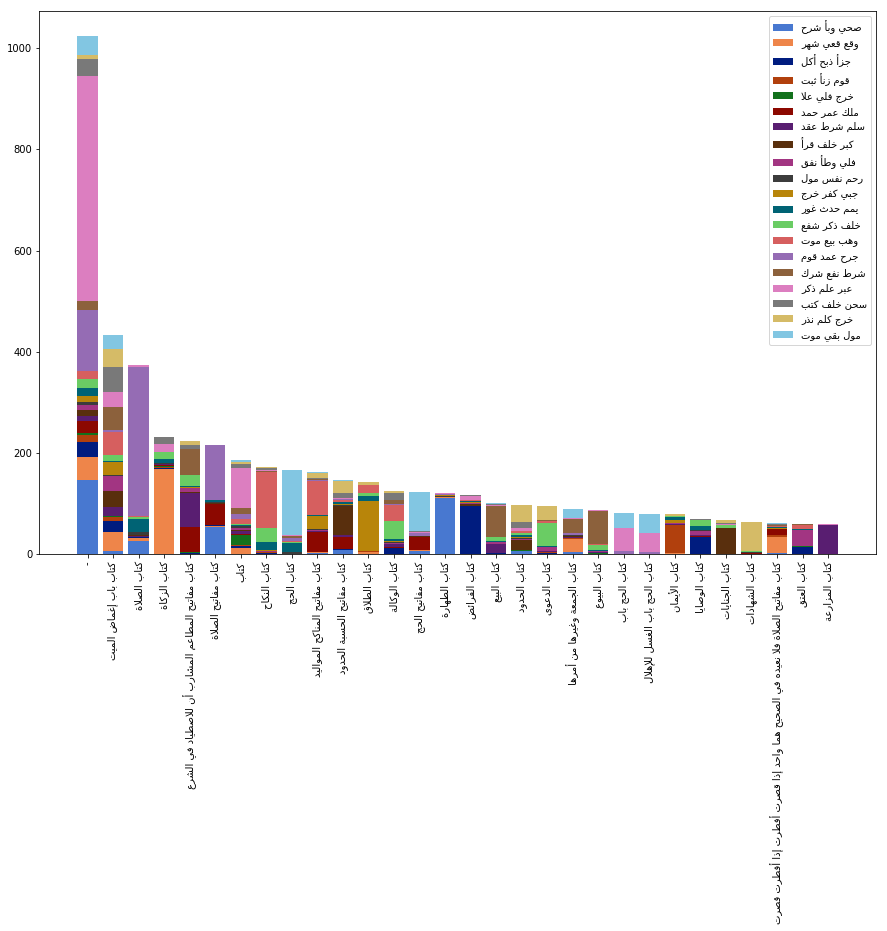

In [40]:
# The 30 most common volume names
voltitles = metadata_newind['VolumeTitle'].value_counts().head(30).index
meta_sub = metadata_newind[metadata_newind.VolumeTitle.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'VolumeTitle', reshape_col1=True, aggfunc=len)

0 باب
1 فصل
2 باب الضمان
3 باب ما جاء في
4 باب القسمة
5 باب ما
6 بابفي
7 باب صلاة الاستسقاء
8 باب البغاة
9 باب الضمان شرط الضامن الرشد
10 باب الاستبراء
11 باب التيمم
12 باب الحيض
13 الفصل الثاني لا يجوز التصرف لولي الطفل مع شيء من ملكه إلا للغبطة والمصلحة له أو لحاجة شديدة من الطفل إلى نفقته وكسوته ولا وجه له سواه ويجوز له شراؤه ويجوز له أن يتصرف في ماله بالتجارة وشرى العقار نظرا له وإذا بلغ الصبي وقد باع وليه شيئا من أملاكه فادعى أنه باعه بلا حاجة ولا غبطة فالقول قول الولي إن كان أباه أو جده وقول الصبي إن كان الولي وصيا أو أمينا وعليهما البينة ويقبل قول الأب أو الجد له أنه أنفق على الصبي أو على عقاره بلا بينة ولا يقبل من الوصي إلا ببينة ويستحق الولي أجرة مثله في القيام بأمر اليتيم ومتى تصرف الولي على وجه لا حظ لليتيم فيه بطل ولم يستحق أجرا ولا يصح بيع الصبي وشراؤه إلا بعد أن يبلغ عشر سنين فصاعدا ويكون رشيدا للأب الفقير أن يأخذ من مال الولد الغني نفقته بلا إسراف إذا لم ينفق
14 باب الخيار في النكاح
15 باب القسامة
16 باب صلاة العيدين
17 باب صوم التطوع
18 باب الخيار والاعفاف ونكاح العبد و

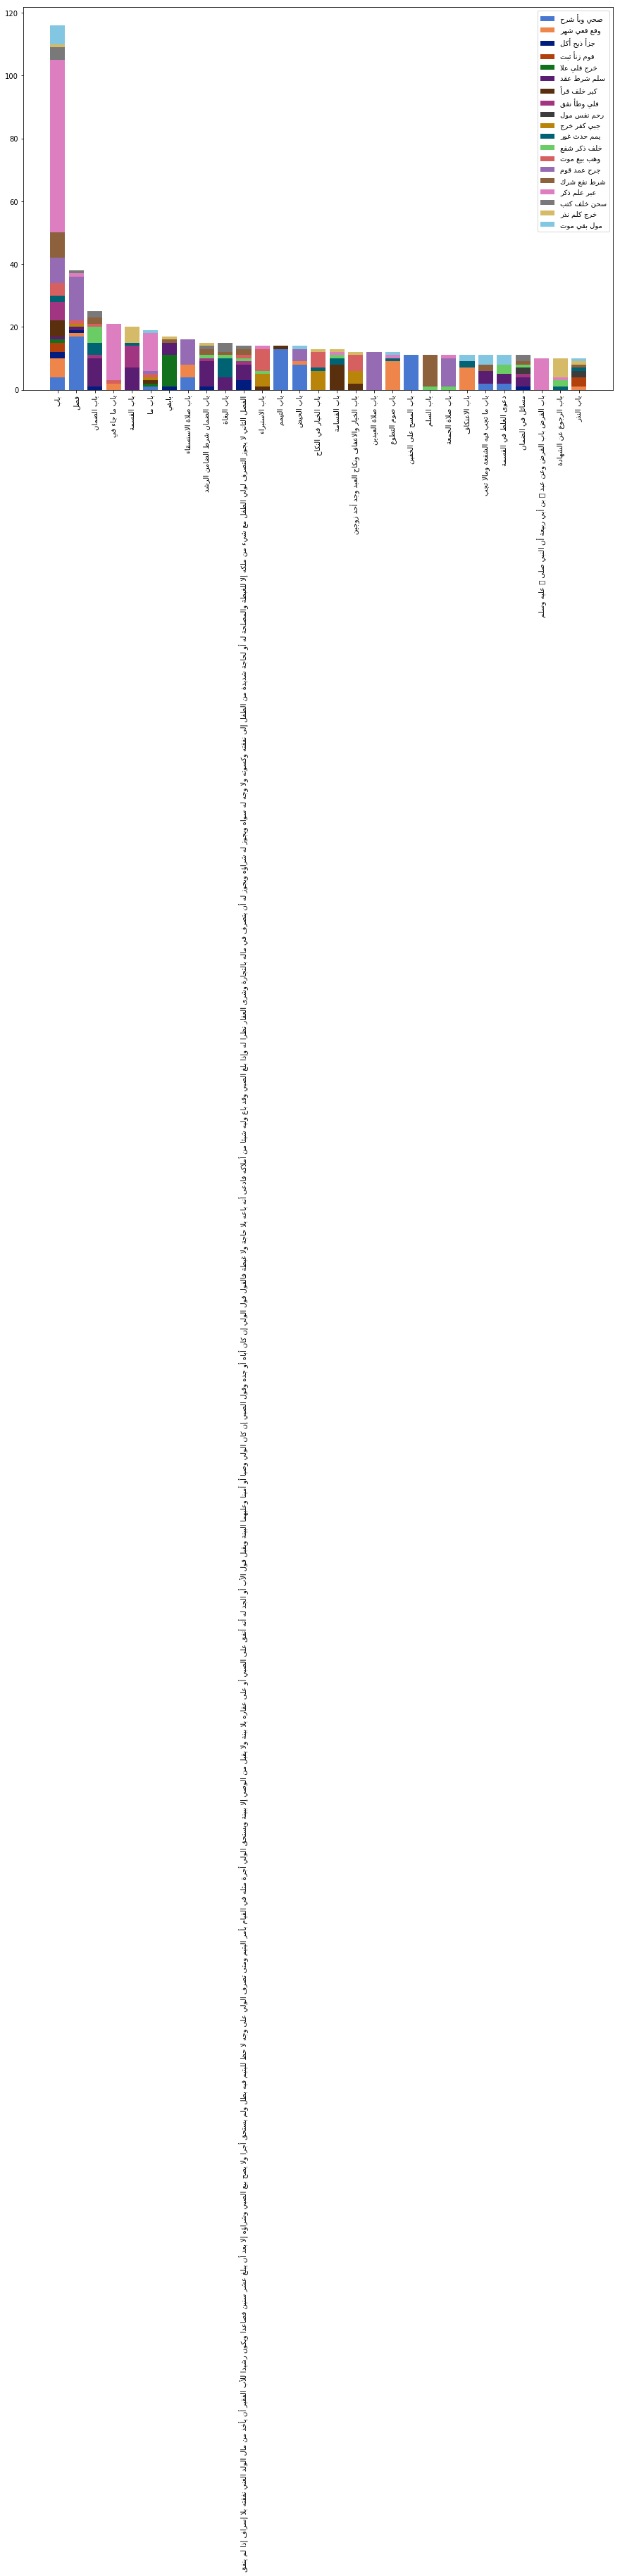

In [41]:
# The 30 most common chapter names
voltitles = metadata_newind['ChapterTitle'].value_counts().head(30)[1:].index
for i, v in enumerate(voltitles):
    print(i, v)
meta_sub = metadata_newind[metadata_newind.ChapterTitle.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'ChapterTitle', reshape_col1=True, aggfunc=len)